In [102]:
import sys,os
sys.path.append(os.pardir)
import glob as glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
%matplotlib inline

# Import data

In [103]:
path="C:\\Users\\yexue\\pytorch-learn\\Bio\\"
#fig_path="C:\\Users\\yexue\\Gesture-Recognition-based-on-IMU\\data\\figs_supp"

In [17]:
data = pd.read_csv("\\".join([path,"data.txt"]), header = 0, sep=',')
data.head()

,25ph,25ox,60conduc,dvconduc,dvox,reindex,label
0,3.93,42.54,43.79,24.23,7.00,1.4726,gutter
1,8.85,48.32,46.63,22.87,7.01,1.4715,gutter
2,4.12,40.08,43.00,22.42,11.50,1.4727,gutter
3,4.09,40.34,40.42,29.98,10.04,1.4745,gutter
4,4.17,39.51,43.04,27.28,10.74,1.4715,gutter


In [32]:
data.columns

Index(['25ph', '25ox', '60conduc', 'dvconduc', 'dvox', 'reindex', 'label'], dtype='object')

# KNN

In [35]:
def test_knn(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                     random_state=0)
    # initialize the values of k for our k-Nearest Neighbor classifier along with the
    # list of accuracies for each value of k
    kVals = range(1, 30, 2)
    accuracies = []

    # loop over various values of `k` for the k-Nearest Neighbor classifier
    for k in range(1, 30, 2):
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNN(n_neighbors=k)
        model.fit(X_train, y_train)

        # evaluate the model and update the accuracies list
        score = model.score(X_test, y_test)
        #print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

    # find the value of k that has the largest accuracy
    i = int(np.argmax(accuracies))
    print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
                                                                           accuracies[i] * 100))

In [36]:
X = np.array(data["25ph"]).reshape(-1, 1)
y = np.array(data["label"])
test_knn(X,y)

k=19 achieved highest accuracy of 50.37% on validation data


## Separated

In [37]:
for target in data.columns[:-1]:
    X = np.array(data[target]).reshape(-1, 1)
    y = np.array(data["label"])
    test_knn(X,y)

k=19 achieved highest accuracy of 50.37% on validation data
k=21 achieved highest accuracy of 61.48% on validation data
k=15 achieved highest accuracy of 56.30% on validation data
k=7 achieved highest accuracy of 62.22% on validation data
k=27 achieved highest accuracy of 59.26% on validation data
k=17 achieved highest accuracy of 39.26% on validation data


## Combined

In [45]:
X = np.array(data.iloc[:, 0:-1])
#print(X)
y = np.array(data["label"])
test_knn(X,y)

k=3 achieved highest accuracy of 99.26% on validation data


In [144]:
X = np.array(data.iloc[:, -5:-1])
#print(X)
y = np.array(data["label"])
test_knn(X,y)

k=1 achieved highest accuracy of 99.26% on validation data


# SVM

In [51]:
from sklearn.svm import SVC

def test_SVM(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                     random_state=0)
    clf = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
    clf.fit(X_train, y_train.ravel())
    print ("train: ",clf.score(X_train, y_train) )
    y_hat = clf.predict(X_train)
    print ("test: ",clf.score(X_test, y_test))
    y_hat = clf.predict(X_test)


## Separated

In [52]:
for target in data.columns[:-1]:
    X = np.array(data[target]).reshape(-1, 1)
    y = np.array(data["label"])
    test_SVM(X,y)

train:  0.5271565495207667
test:  0.4962962962962963
train:  0.7507987220447284
test:  0.562962962962963
train:  0.6741214057507987
test:  0.4888888888888889
train:  0.6900958466453674
test:  0.6444444444444445
train:  0.6613418530351438
test:  0.5037037037037037
train:  0.24920127795527156
test:  0.2518518518518518


## Combined

In [58]:
X = np.array(data.iloc[:, 0:-1])
#print(X)
y = np.array(data["label"])
test_SVM(X,y)

train:  1.0
test:  0.2518518518518518


In [59]:
X = np.array(data.iloc[:, -5:-1])
#print(X)
y = np.array(data["label"])
test_SVM(X,y)

train:  1.0
test:  0.2518518518518518


# ANN

In [104]:
#pytorch
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import DatasetFolder
from torchvision.utils import make_grid
from torch.utils.data import Dataset,DataLoader
import time

In [146]:
# find number of categories
len(np.unique(y))

6

In [147]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,4)
        self.fc2 = nn.Linear(4,8)
        self.fc3 = nn.Linear(8, 6)

    def forward(self, x):
        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        #print(x.size())  # [5,40]
        #x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        #print(x.size())  # [5,10]
        #x = F.dropout(x,training=self.training)
        x = self.fc3(x)
        #print(x.size())  # [5,10]

#         return F.log_softmax(x,dim=1)
        return F.log_softmax(x)
print(Net())

Net(
  (fc1): Linear(in_features=1, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=6, bias=True)
)


In [148]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
#         if is_cuda:
#             data,target = data.cuda(),target.cuda()
        data , target = Variable(data,volatile),Variable(target)
        target = torch.tensor(target, dtype=torch.long) 
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data.float())
        #print("output:",output.shape,target.shape)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output,target,size_average=False).item()
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct/len(data_loader.dataset)
    
    #print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [149]:
model = Net()
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

In [150]:
def test_ANN(X,y,epoch_num):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                                                        random_state=0)
    X_train  = torch.tensor(X_train)
    y_train = torch.IntTensor(y_train)
    X_test  = torch.tensor(X_test)
    y_test = torch.IntTensor(y_test)
    train = torch.utils.data.TensorDataset(X_train, y_train)
    valid = torch.utils.data.TensorDataset(X_test, y_test)

    train_data_loader = torch.utils.data.DataLoader(train,batch_size=32,shuffle=True)
    valid_data_loader = torch.utils.data.DataLoader(valid,batch_size=32,shuffle=True)

    train_losses , train_accuracy = [],[]
    val_losses , val_accuracy = [],[]
    for epoch in range(1,epoch_num):
        epoch_loss, epoch_accuracy = fit(epoch,model,train_data_loader,phase='training')
        val_epoch_loss , val_epoch_accuracy = fit(epoch,model,valid_data_loader,phase='validation')
        train_losses.append(epoch_loss)
        train_accuracy.append(epoch_accuracy)
        val_losses.append(val_epoch_loss)
        val_accuracy.append(val_epoch_accuracy)
    
    print(max(train_accuracy),max(val_accuracy))
    plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label = 'train accuracy')
    plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
    plt.legend()

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\yexue\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(36.1022) tensor(37.0370)


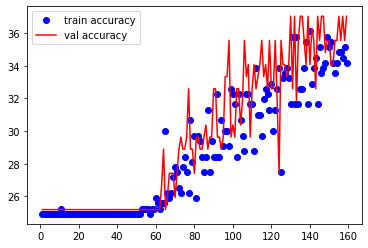

In [152]:
X = np.array(data["25ph"]).reshape(-1, 1)
y = np.array(pd.factorize(data["label"])[0].astype("int16"))
test_ANN(X,y,160)

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\yexue\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(54.3131) tensor(53.3333)


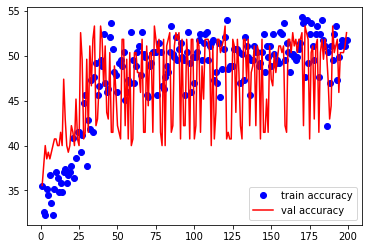

In [120]:
X = np.array(data["25ox"]).reshape(-1, 1)
test_ANN(X,y,200)

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\yexue\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(47.6038) tensor(48.1481)


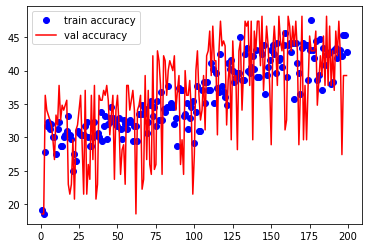

In [121]:
X = np.array(data['60conduc']).reshape(-1, 1)
y = np.array(pd.factorize(data["label"])[0].astype("int16"))
test_ANN(X,y,200)

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\yexue\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(54.9521) tensor(54.8148)


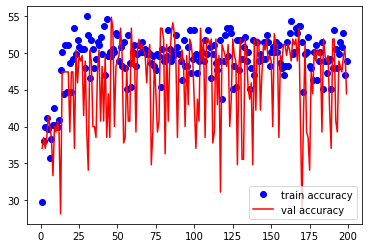

In [122]:
X = np.array(data['dvconduc']).reshape(-1, 1)
test_ANN(X,y,200)

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\yexue\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(49.5208) tensor(53.3333)


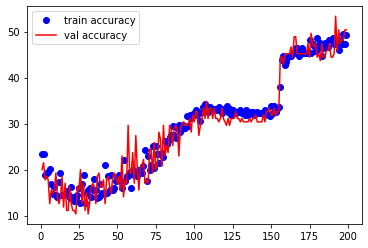

In [123]:
X = np.array(data['dvox']).reshape(-1, 1)
test_ANN(X,y,200)

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\yexue\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(24.9201) tensor(25.1852)


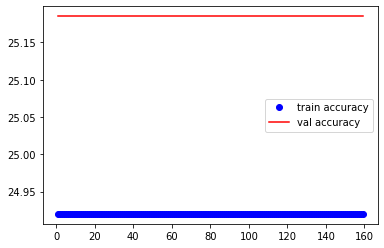

In [127]:
X = np.array(data['reindex']).reshape(-1, 1)
test_ANN(X,y,160)

In [140]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4,4)
        self.fc2 = nn.Linear(4,8)
        self.fc3 = nn.Linear(8, 6)

    def forward(self, x):
        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        #print(x.size())  # [5,40]
        #x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        #print(x.size())  # [5,10]
        #x = F.dropout(x,training=self.training)
        x = self.fc3(x)
        #print(x.size())  # [5,10]

#         return F.log_softmax(x,dim=1)
        return F.log_softmax(x)
print(Net())

Net(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=6, bias=True)
)


In [141]:
model = Net()
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\yexue\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(95.2077) tensor(91.8519)


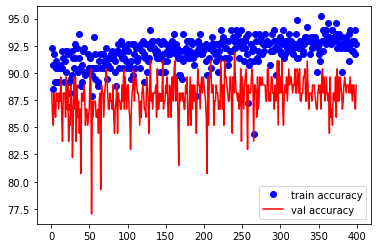

In [143]:
X = np.array(data.iloc[:,-5:-1])
y = np.array(pd.factorize(data["label"])[0].astype("int16"))
test_ANN(X,y,400)